In [129]:
import sounddevice as sd
import wavio
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
from modules.pre_processing.scripts.pre_processing_data import AudioDataPreProcessor
import numpy as np
from modules.extracting_feature.scripts.extract_statistic_features import StatisticFeatureExtraction

In [130]:
def record_audio(filename, duration, samplerate):
    """
    Ghi âm và lưu vào tệp WAV.

    Args:
        filename (str): Tên tệp để lưu âm thanh.
        duration (int): Thời gian ghi âm (tính bằng giây).
        samplerate (int, optional): Tần số mẫu. Mặc định là 44100.
    """
    print(f"Recording {filename}...")
    recording = sd.rec(int(duration * samplerate), samplerate=samplerate, channels=2)
    sd.wait()  # Chờ cho đến khi ghi âm hoàn tất
    print("Recording finished.")
    wavio.write(filename, recording, samplerate, sampwidth=2)
    print(f"Audio saved to {filename}")

In [131]:
def plot_and_play_audio(file_name):
    """
    Đọc tệp âm thanh, vẽ đồ thị dữ liệu âm thanh và phát lại ghi âm.

    Args:
        file_name (str): Tên tệp âm thanh.
    """
    # Tải dữ liệu âm thanh
    data, sr = librosa.load(file_name, sr=None)
    
    # Hiển thị dữ liệu âm thanh
    ipd.display(ipd.Audio(data, rate=sr))
    
    # Vẽ đồ thị của dữ liệu âm thanh ban đầu
    plt.figure(figsize=(14, 5))
    plt.plot(data)
    plt.title('Waveform of the Recorded Audio')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.show()

Recording test.wav...
Recording finished.
Audio saved to test.wav


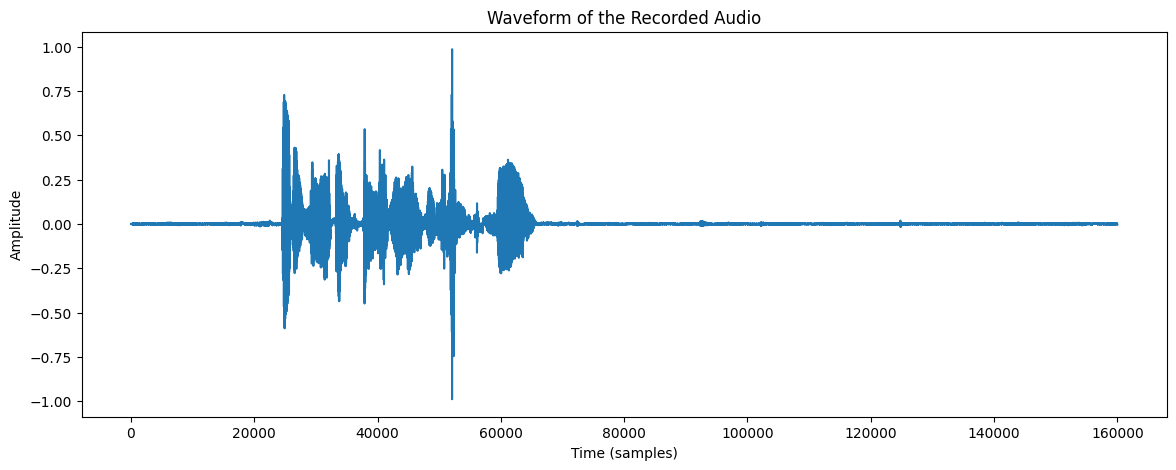

In [132]:
file_name = 'test.wav'
duration = 10
sr = 16000
record_audio(file_name, duration, sr)
plot_and_play_audio(file_name)

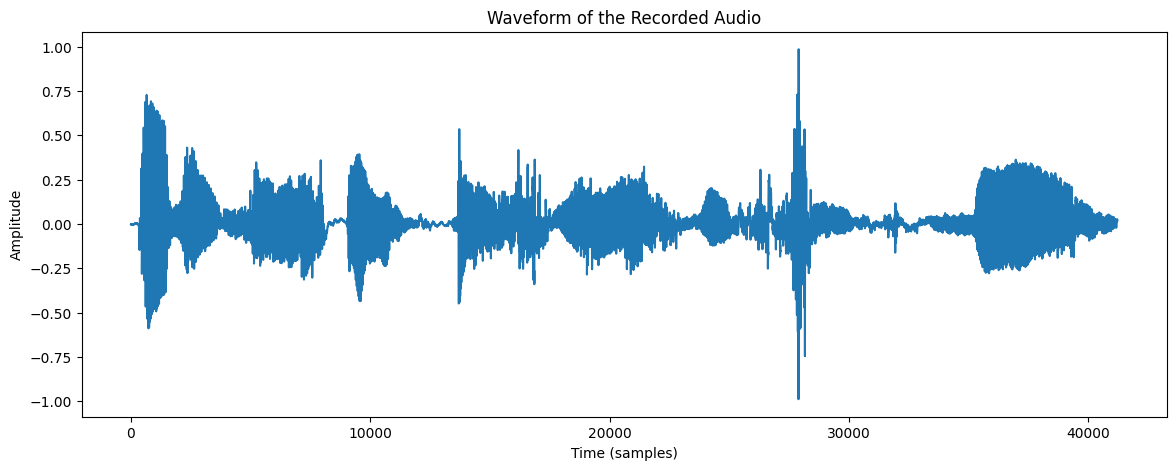

In [133]:
audio_data_processor = AudioDataPreProcessor("./", "./")
audio_data_processor.process_file(file_name, './')
plot_and_play_audio(file_name)

In [134]:
statistic_feature_extractor = StatisticFeatureExtraction(26)
features = statistic_feature_extractor._feature_engineering_for_file('test.wav')
feature_arr = np.array(list(features.values())).reshape(1, -1)

In [135]:
import joblib
def load_scaler(scaler_file):
  return joblib.load(scaler_file) 

scaler = load_scaler("models/best_fine_tuned_scaler.pkl")

In [136]:
scaled_arr = scaler.transform(feature_arr)

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [137]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model_path = "models/best_fine_tuned_model.keras"
model = load_model(model_path)

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
scaled_arr = np.expand_dims(scaled_arr, axis=2)

In [140]:
scaled_arr.shape

(1, 307, 1)

In [141]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 307, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 307, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 307, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 307, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 154, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 154, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 154, 64)        │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 154, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 154, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 154, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 77, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 77, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,261,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356,567 (5.17 MB)

 Trainable params: 1,799 (7.03 KB)

 Non-trainable params: 1,351,168 (5.15 MB)

 Optimizer params: 3,600 (14.07 KB)

In [142]:
predictions = model.predict(scaled_arr)
top_3_indices = np.argsort(predictions[0])[-3:][::-1]
emotion_classes = ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Surprised']
top_3_emotions = [(emotion_classes[i], predictions[0][i]) for i in top_3_indices]
for emotion, score in top_3_emotions:
    print(f'Emotion: {emotion}, Score: {score:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Emotion: Angry, Score: 0.6701
Emotion: Disgusted, Score: 0.1807
Emotion: Happy, Score: 0.0991
